<a href="https://colab.research.google.com/github/Joyeeta-Sarkar/forest_fire_detection-and-predicton/blob/main/Fire_prediction_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob

In [3]:
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [4]:
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder

In [5]:
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer

In [7]:
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model

In [9]:
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
!pip install catboost
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.3 MB/s eta 0:00:00


In [10]:
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [11]:
#Main path
Fire_Dataset_Path = Path("/content/images")

In [12]:
#Path Process
PNG_Path = list(Fire_Dataset_Path.glob(r"*/*.png"))

In [13]:
#Label process
PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],PNG_Path))

In [15]:
print("FIRE: ", PNG_Labels.count("Fire"))
print("NO_FIRE: ", PNG_Labels.count("Not Fire"))

FIRE:  576
NO_FIRE:  236


In [16]:
#Transform to series structure
PNG_Path_Series = pd.Series(PNG_Path,name="PNG").astype(str)
PNG_Labels_Series = pd.Series(PNG_Labels,name="CATEGORY")

In [17]:
print(PNG_Path_Series)

0              /content/images/Fire/fire.194.png
1              /content/images/Fire/fire.150.png
2               /content/images/Fire/fire.37.png
3              /content/images/Fire/fire.321.png
4              /content/images/Fire/fire.151.png
                         ...                    
807    /content/images/Not Fire/non_fire.241.png
808    /content/images/Not Fire/non_fire.169.png
809    /content/images/Not Fire/non_fire.213.png
810     /content/images/Not Fire/non_fire.30.png
811     /content/images/Not Fire/non_fire.78.png
Name: PNG, Length: 812, dtype: object


In [18]:
print(PNG_Labels_Series)

0          Fire
1          Fire
2          Fire
3          Fire
4          Fire
         ...   
807    Not Fire
808    Not Fire
809    Not Fire
810    Not Fire
811    Not Fire
Name: CATEGORY, Length: 812, dtype: object


In [19]:
#Transform to dataframe structure
Main_Train_Data = pd.concat([PNG_Path_Series,PNG_Labels_Series],axis=1)

In [20]:
print(Main_Train_Data.head(-1))

                                           PNG  CATEGORY
0            /content/images/Fire/fire.194.png      Fire
1            /content/images/Fire/fire.150.png      Fire
2             /content/images/Fire/fire.37.png      Fire
3            /content/images/Fire/fire.321.png      Fire
4            /content/images/Fire/fire.151.png      Fire
..                                         ...       ...
806  /content/images/Not Fire/non_fire.235.png  Not Fire
807  /content/images/Not Fire/non_fire.241.png  Not Fire
808  /content/images/Not Fire/non_fire.169.png  Not Fire
809  /content/images/Not Fire/non_fire.213.png  Not Fire
810   /content/images/Not Fire/non_fire.30.png  Not Fire

[811 rows x 2 columns]


In [21]:
#Shuffling
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [22]:
print(Main_Train_Data.head(-1))

                                           PNG  CATEGORY
0            /content/images/Fire/fire.232.png      Fire
1            /content/images/Fire/fire.652.png      Fire
2    /content/images/Not Fire/non_fire.174.png  Not Fire
3            /content/images/Fire/fire.664.png      Fire
4            /content/images/Fire/fire.276.png      Fire
..                                         ...       ...
806  /content/images/Not Fire/non_fire.198.png  Not Fire
807          /content/images/Fire/fire.398.png      Fire
808          /content/images/Fire/fire.189.png      Fire
809          /content/images/Fire/fire.461.png      Fire
810          /content/images/Fire/fire.561.png      Fire

[811 rows x 2 columns]


In [24]:
print(Main_Train_Data["PNG"][2])
print(Main_Train_Data["CATEGORY"][2])
print(Main_Train_Data["PNG"][200])
print(Main_Train_Data["CATEGORY"][200])
print(Main_Train_Data["PNG"][45])
print(Main_Train_Data["CATEGORY"][45])
print(Main_Train_Data["PNG"][567])
print(Main_Train_Data["CATEGORY"][567])

/content/images/Not Fire/non_fire.174.png
Not Fire
/content/images/Fire/fire.430.png
Fire
/content/images/Fire/fire.462.png
Fire
/content/images/Not Fire/non_fire.185.png
Not Fire


In [30]:
print(Main_Train_Data.head(-1))

                                           PNG  CATEGORY
0            /content/images/Fire/fire.232.png      Fire
1            /content/images/Fire/fire.652.png      Fire
2    /content/images/Not Fire/non_fire.174.png  Not Fire
3            /content/images/Fire/fire.664.png      Fire
4            /content/images/Fire/fire.276.png      Fire
..                                         ...       ...
806  /content/images/Not Fire/non_fire.198.png  Not Fire
807          /content/images/Fire/fire.398.png      Fire
808          /content/images/Fire/fire.189.png      Fire
809          /content/images/Fire/fire.461.png      Fire
810          /content/images/Fire/fire.561.png      Fire

[811 rows x 2 columns]


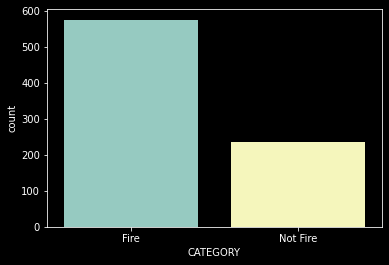

In [31]:
#Visualization
plt.style.use("dark_background")
sns.countplot(Main_Train_Data["CATEGORY"])
plt.show()

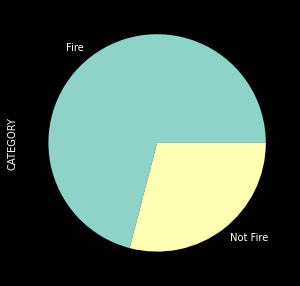

In [32]:
Main_Train_Data['CATEGORY'].value_counts().plot.pie(figsize=(5,5))
plt.show()

Text(0.5, 1.0, 'Not Fire')

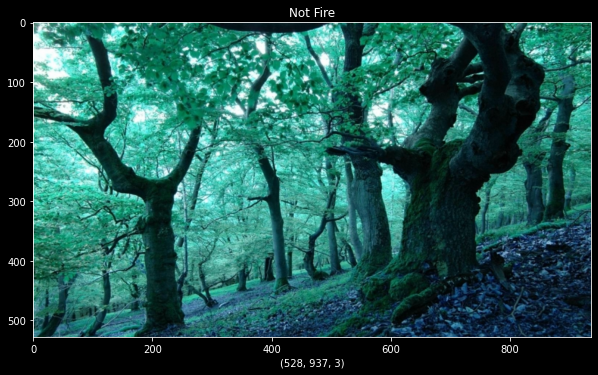

In [36]:
figure = plt.figure(figsize=(10,10))
x = cv2.imread(Main_Train_Data["PNG"][108])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][108])

Text(0.5, 1.0, 'Fire')

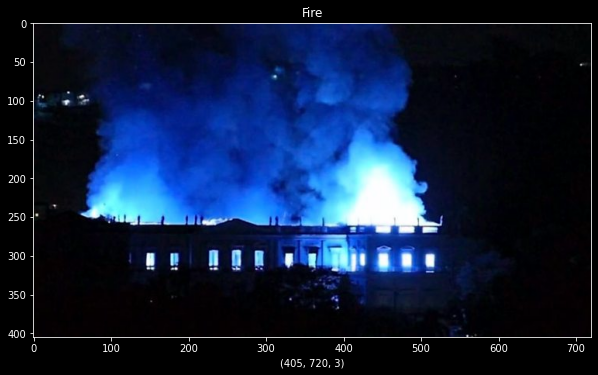

In [35]:
figure = plt.figure(figsize=(10,10))
x = cv2.imread(Main_Train_Data["PNG"][439])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][439])

Text(0.5, 1.0, 'Not Fire')

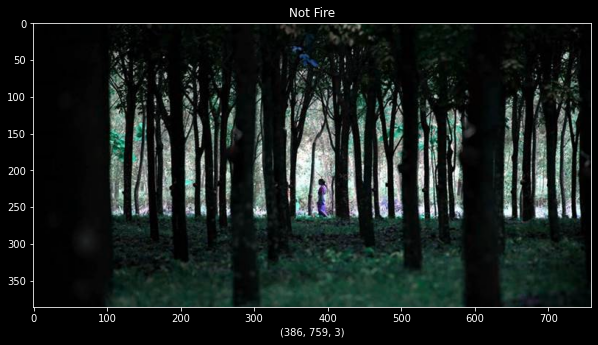

In [37]:
figure = plt.figure(figsize=(10,10))
x = cv2.imread(Main_Train_Data["PNG"][20])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][20])


Text(0.5, 1.0, 'Fire')

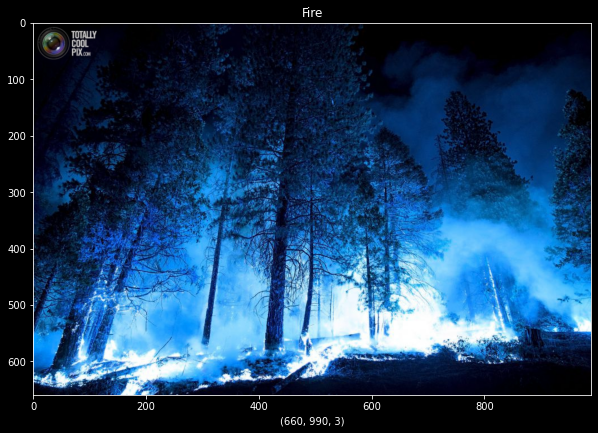

In [38]:
figure = plt.figure(figsize=(10,10))
x = cv2.imread(Main_Train_Data["PNG"][349])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][349])

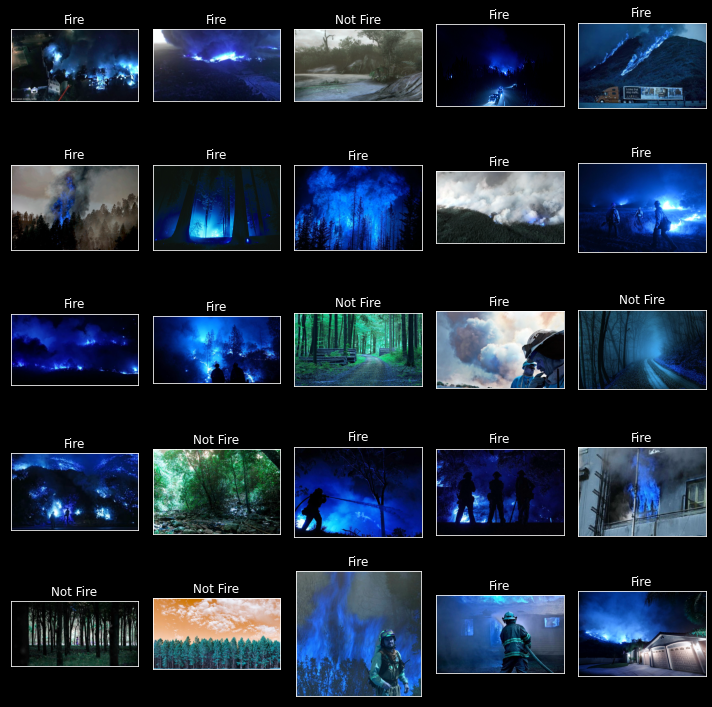

In [39]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(cv2.imread(Main_Train_Data["PNG"][i]))
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

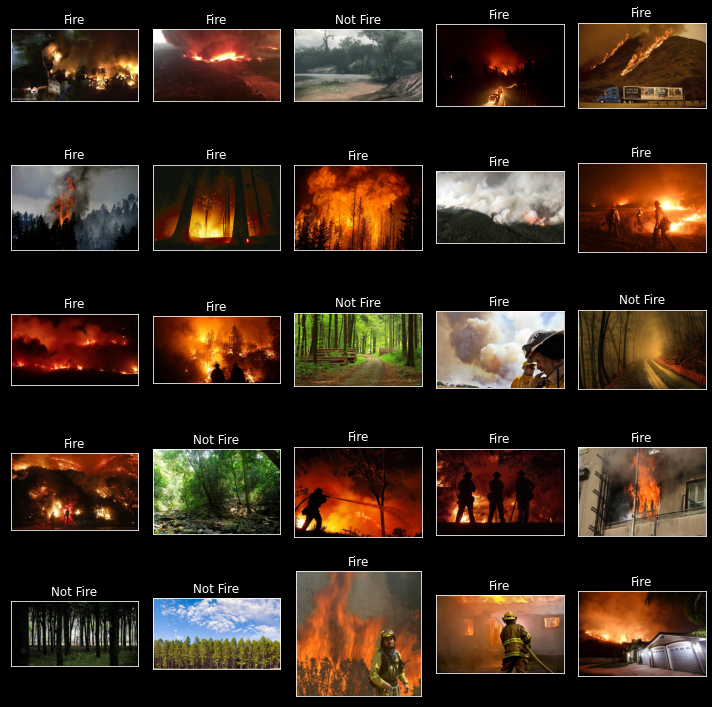

In [40]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    x = cv2.imread(Main_Train_Data["PNG"][i])
    x = cv2.cvtColor(x,cv2.COLOR_RGB2BGR)
    ax.imshow(x)
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

In [42]:
#Train and test data
#image_generator
Train_Generator = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.3,
                                    zoom_range=0.2,
                                    brightness_range=[0.2,0.9],
                                    rotation_range=30,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode="nearest",
                                    validation_split=0.1)
Test_Generator = ImageDataGenerator(rescale=1./255)

In [43]:
#Splitting train and test
Train_Data,Test_Data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42,shuffle=True)
print("TRAIN SHAPE: ",Train_Data.shape)
print("TEST SHAPE: ",Test_Data.shape)

TRAIN SHAPE:  (730, 2)
TEST SHAPE:  (82, 2)


In [44]:
print(Train_Data.head(-1))
print("----"*20)
print(Test_Data.head(-1))

                                           PNG  CATEGORY
465          /content/images/Fire/fire.321.png      Fire
72           /content/images/Fire/fire.708.png      Fire
77           /content/images/Fire/fire.241.png      Fire
493          /content/images/Fire/fire.494.png      Fire
519          /content/images/Fire/fire.600.png      Fire
..                                         ...       ...
700          /content/images/Fire/fire.653.png      Fire
71           /content/images/Fire/fire.446.png      Fire
106   /content/images/Not Fire/non_fire.65.png  Not Fire
270          /content/images/Fire/fire.718.png      Fire
435  /content/images/Not Fire/non_fire.193.png  Not Fire

[729 rows x 2 columns]
--------------------------------------------------------------------------------
                                           PNG  CATEGORY
247          /content/images/Fire/fire.428.png      Fire
575  /content/images/Not Fire/non_fire.171.png  Not Fire
227          /content/images/Fire/fire.3

In [45]:
print(Test_Data["CATEGORY"].value_counts())

Fire        61
Not Fire    21
Name: CATEGORY, dtype: int64


In [46]:
encode = LabelEncoder()

In [47]:
For_Prediction_Class = encode.fit_transform(Test_Data["CATEGORY"])

In [52]:
#How would the image generator look like
example_Image = Train_Data["PNG"][56]
Load_Image = image.load_img(example_Image,target_size=(300,300))
Array_Image = image.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,) + Array_Image.shape)

i = 0
for batch in Train_Generator.flow(Array_Image,batch_size=1):
    plt.figure(i)
    IMG = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

AttributeError: ignored

In [53]:
#APPLYING GENERATOR AND TRANSFORMATION TO TENSOR
Train_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   batch_size=32,
                                                   subset="training")

Found 657 validated image filenames belonging to 2 classes.


In [54]:
Validation_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   batch_size=32,
                                                   subset="validation")

Found 73 validated image filenames belonging to 2 classes.


In [55]:
Test_IMG_Set = Test_Generator.flow_from_dataframe(dataframe=Test_Data,
                                                 x_col="PNG",
                                                 y_col="CATEGORY",
                                                 color_mode="rgb",
                                                 class_mode="categorical",
                                                 batch_size=32)

Found 82 validated image filenames belonging to 2 classes.


In [56]:
#Checking
for data_batch,label_batch in Train_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 2)


In [57]:
for data_batch,label_batch in Validation_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 2)


In [58]:
for data_batch,label_batch in Test_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 2)


In [60]:
print("TRAIN: ")
print(Train_IMG_Set.class_indices)
print(Train_IMG_Set.classes[0:9])
print(Train_IMG_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_IMG_Set.class_indices)
print(Validation_IMG_Set.classes[0:9])
print(Validation_IMG_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_IMG_Set.class_indices)
print(Test_IMG_Set.classes[0:9])
print(Test_IMG_Set.image_shape)

TRAIN: 
{'Fire': 0, 'Not Fire': 1}
[0, 0, 0, 0, 0, 1, 1, 0, 0]
(256, 256, 3)
------------------------------------------------------------
VALIDATION: 
{'Fire': 0, 'Not Fire': 1}
[0, 0, 0, 0, 0, 0, 0, 0, 0]
(256, 256, 3)
------------------------------------------------------------
TEST: 
{'Fire': 0, 'Not Fire': 1}
[0, 1, 0, 0, 0, 0, 1, 0, 0]
(256, 256, 3)


In [61]:
#CNN
Model = Sequential()

Model.add(Conv2D(32,(3,3),activation="relu",
                 input_shape=(256,256,3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(64,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.2))
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(128,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.5))
Model.add(MaxPooling2D((2,2)))


#
Model.add(Flatten())
Model.add(Dense(256,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(1,activation="sigmoid"))

In [62]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5,mode="min")

In [63]:
Model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [64]:
CNN_Model = Model.fit(Train_IMG_Set,
                      validation_data=Validation_IMG_Set,
                            callbacks=Call_Back,
                      epochs=50)

Epoch 1/50
21/21 [==============================] - 160s 7s/step - loss: 25.9383 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/50
21/21 [==============================] - 149s 7s/step - loss: 0.7016 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/50
21/21 [==============================] - 149s 7s/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/50
21/21 [==============================] - 151s 7s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/50
21/21 [==============================] - 159s 8s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/50
21/21 [==============================] - 153s 7s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/50
21/21 [==============================] - 157s 7s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/50
2

In [65]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 127, 127, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0

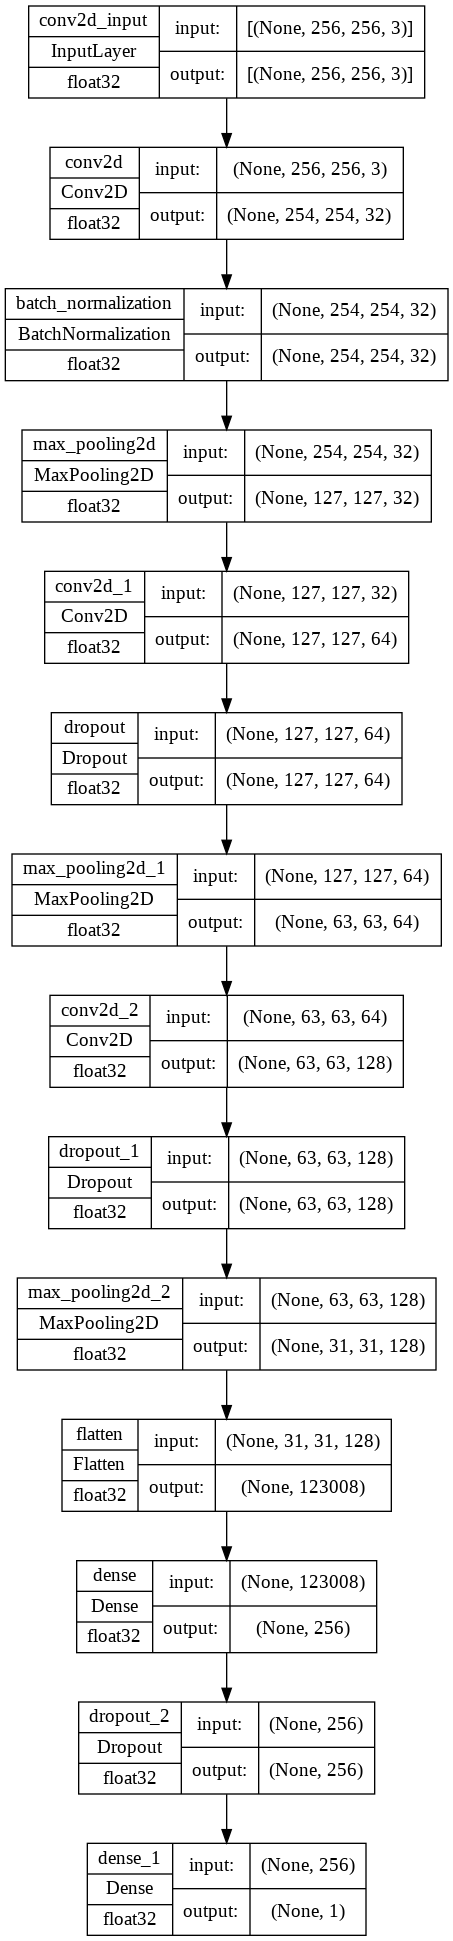

In [66]:
plot_model(Model,to_file="Model_One.png",show_layer_names=True,show_dtype=True,show_shapes=True)

In [67]:
Model_Results = Model.evaluate(Test_IMG_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

3/3 [==============================] - 7s 2s/step - loss: 0.6931 - accuracy: 0.5000
LOSS:  0.6931
ACCURACY:  0.50


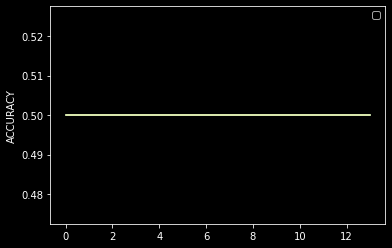

In [68]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

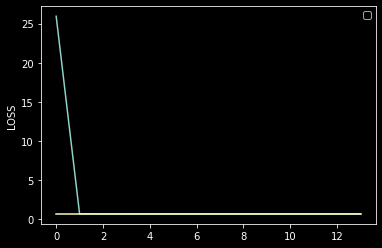

In [69]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

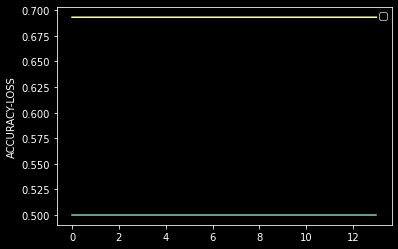

In [70]:
plt.plot(CNN_Model.history["val_accuracy"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("ACCURACY-LOSS")
plt.legend()
plt.show()

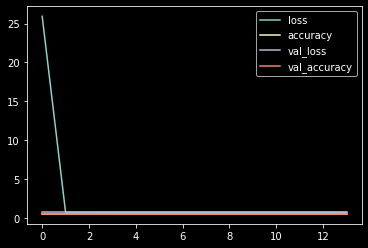

In [71]:
Dict_Summary_One = pd.DataFrame(CNN_Model.history)
Dict_Summary_One.plot()

In [78]:
#PREDICTION
Prediction_One = Model.predict(Test_IMG_Set)
Prediction_One = Prediction_One.argmax(axis=-1)
print(Prediction_One)

3/3 [==============================] - 6s 1s/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


NameError: ignored

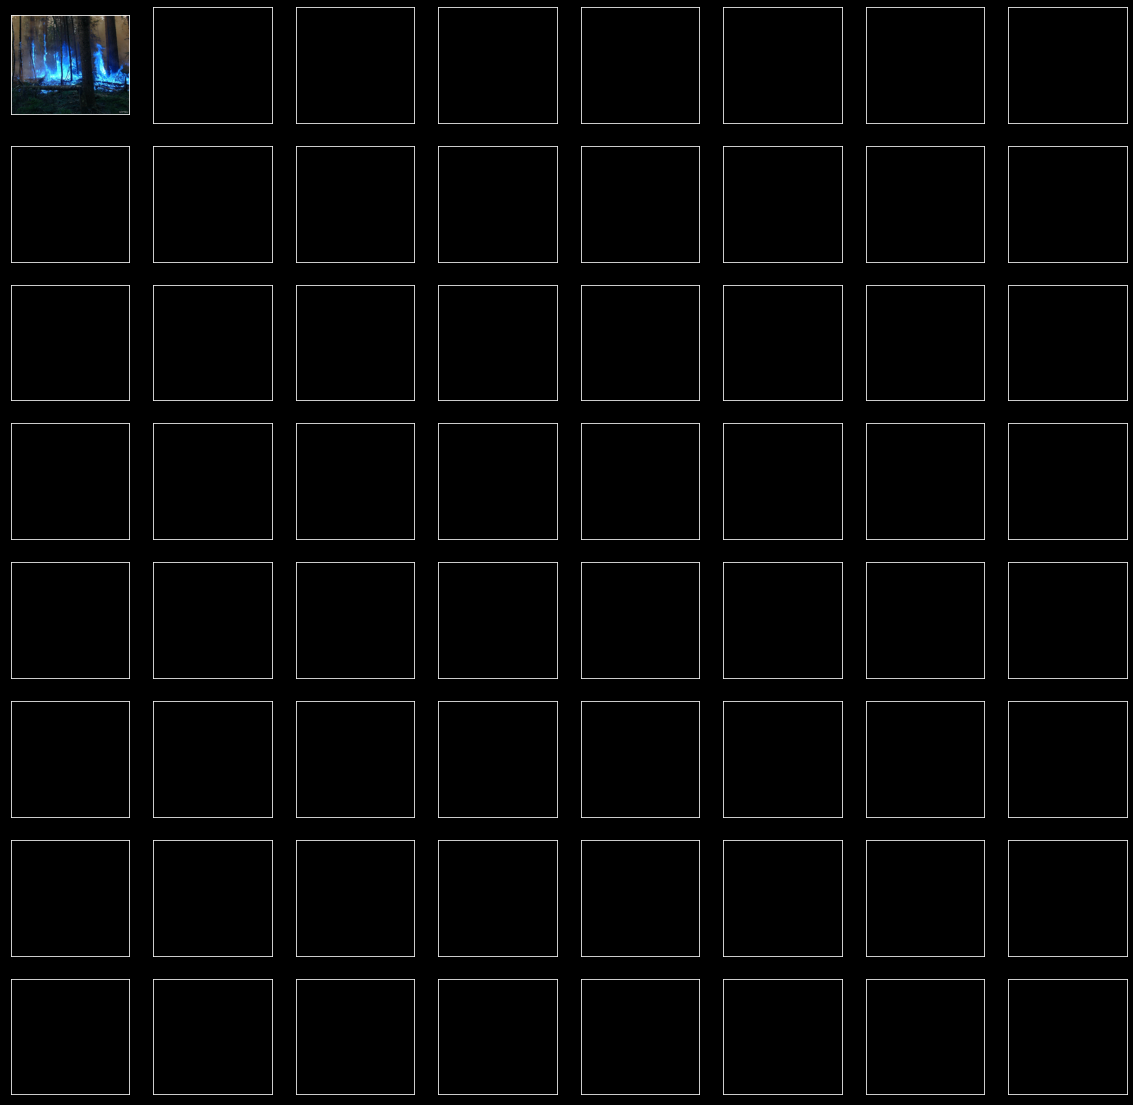

In [80]:
fig, axes = plt.subplots(nrows=8,
                         ncols=8,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(cv2.imread(Test_Data["PNG"].iloc[i]))
    ax.set_title(f"TEST:{Test_Data.CATEGORY.iloc[i]}\n PREDICTION:{Predict_Class[i]}")
plt.tight_layout()
plt.show()
